<a href="https://colab.research.google.com/github/RusianaH/Costumer_churn_prediction/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Impor libaray & load dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/challange2/Data Train.csv')

Mounted at /content/drive


In [ ]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
df.tail()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no
4249,VT,86,area_code_415,no,yes,34,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51,0,no


In [ ]:
df.shape

(4250, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


Explanation

`state`: The state where the customer is located.

`account_length`: Customer account length in days.

`area_code`: Customer telephone area code.

`international_plan`: Whether the customer has an international plan (yes/no).

`voice_mail_plan`: Whether the customer has a voicemail plan (yes/no).

`number_vmail_messages`: Number of voicemail messages received by the customer.

`total_day_minutes`: Total call duration during the day in minutes.

`total_day_calls`: Total number of calls during the day.

`total_day_charge`: Total call cost for the day.

`total_eve_minutes`: Total call duration during the afternoon in minutes.

`total_eve_calls`: Total number of calls during the afternoon.

`total_eve_charge`: Total cost of calls during the afternoon.

`total_night_minutes`: Total call duration during the night in minutes.

`total_night_calls`: Total number of calls during the night.

`total_night_charge`: Total cost of calls during the night.

`total_intl_minutes`: Total duration of international calls in minutes.

`total_intl_calls`: Total number of international calls.

`total_intl_charge`: Total cost of international calls.

`number_customer_service_calls`: Number of customer service calls made by the customer.

`churn`: Target label, indicating whether customers churn (yes/no).

# EDA (Exploratory Data Analysis)

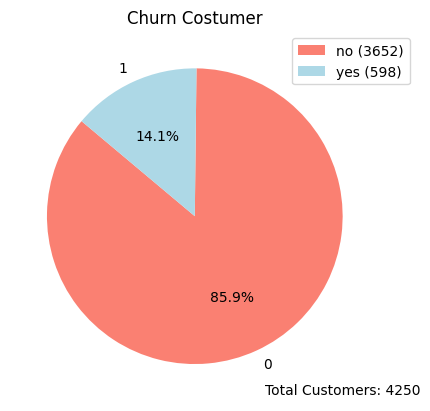

In [ ]:
churn_counts = df['churn'].value_counts()
total_customers = churn_counts.sum()

churned = churn_counts / total_customers

churned.plot(kind='pie', colors=['salmon', 'lightblue'], autopct='%1.1f%%', startangle=140)

plt.title('Churn Costumer')
plt.ylabel('')
labels = ['no', 'yes']
legend_labels = ['{} ({})'.format(label, churn_counts[i]) for i, label in enumerate(labels)]
plt.legend(labels=legend_labels, loc='upper right', bbox_to_anchor=(1.1, 1))

plt.text(1, -1.2, 'Total Customers: {}'.format(total_customers), ha='center')

plt.show()

In [ ]:
# memisahkan feature numerical dengan categorical
numerical = []
categorical = []
for i in df.columns:
  if df[i].dtype == 'object':
    categorical.append(i)
  else:
    numerical.append(i)
print('jumlah = ',len(numerical))
print('numeric = ',numerical)
print('jumlah = ',len(categorical))
print('categoric = ',categorical)

jumlah =  15
numeric =  ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
jumlah =  5
categoric =  ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


## Statistical summary for **numeric**

In [ ]:
df[numerical].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


## Statistical summary for categorical

In [ ]:
df[categorical].describe().transpose()

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


In [ ]:
df.duplicated().sum()

0

## Univariate analysis : Numerical Features

In [ ]:
print(numerical)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [ ]:
nums = [['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']]

In [ ]:
len(nums)

1

### Distribution Numerical Features

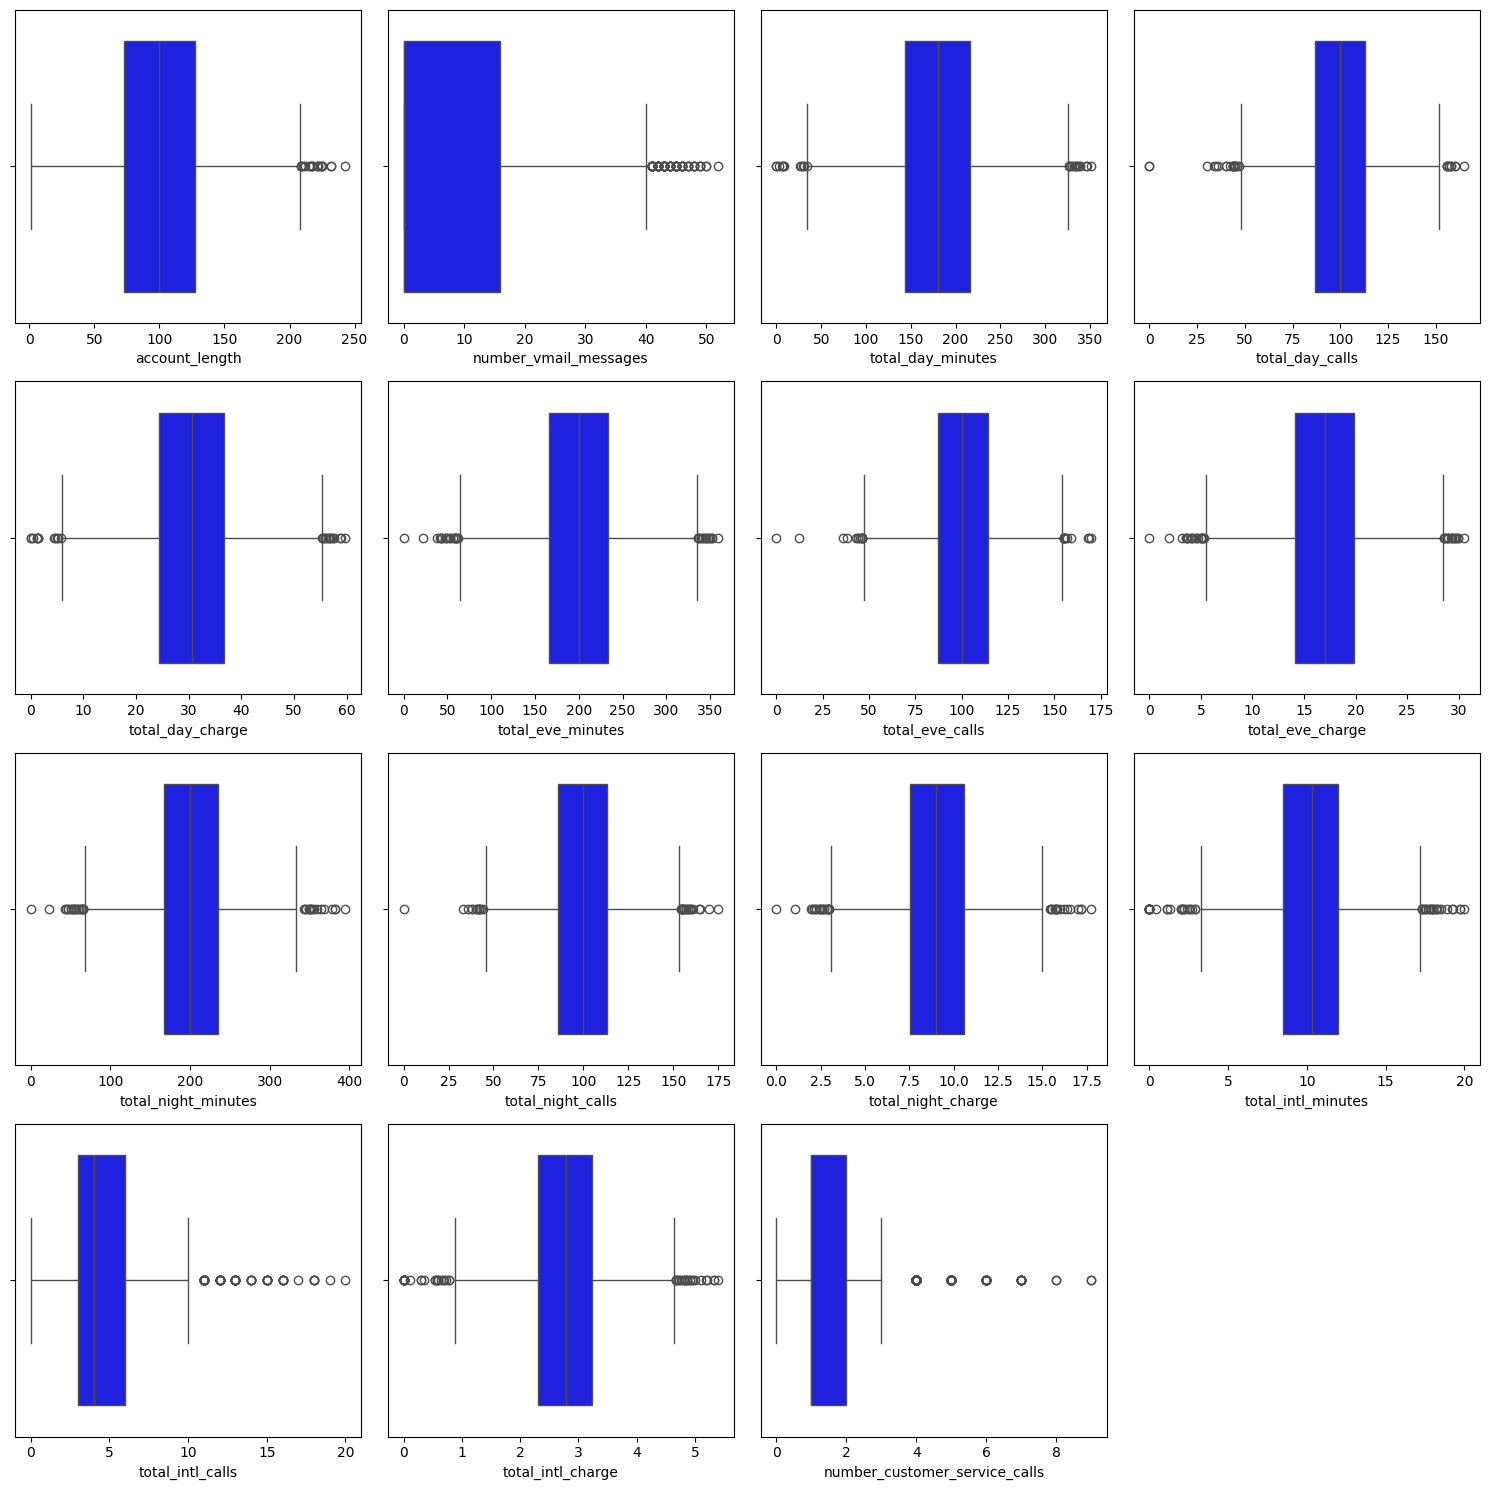

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))

numerical_columns = nums[0]

for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[column], color="blue")
    plt.xlabel(column)
    plt.tight_layout()

plt.show()

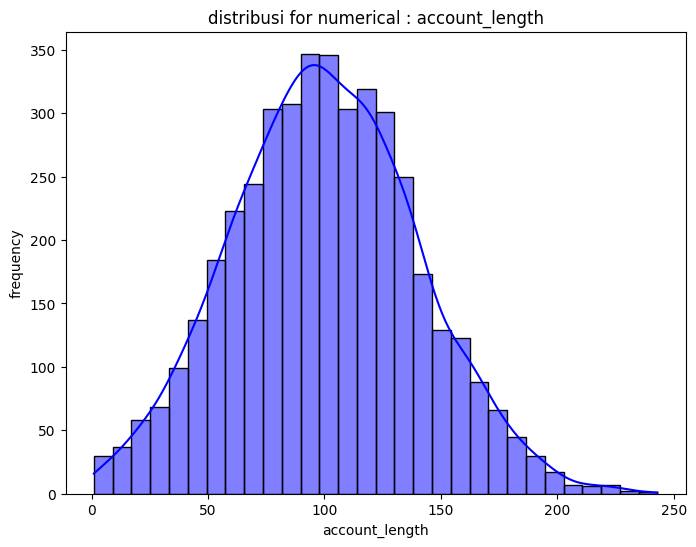

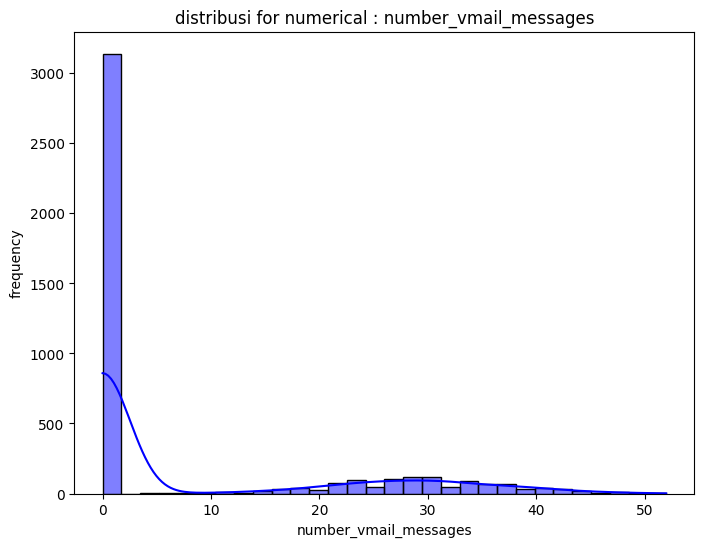

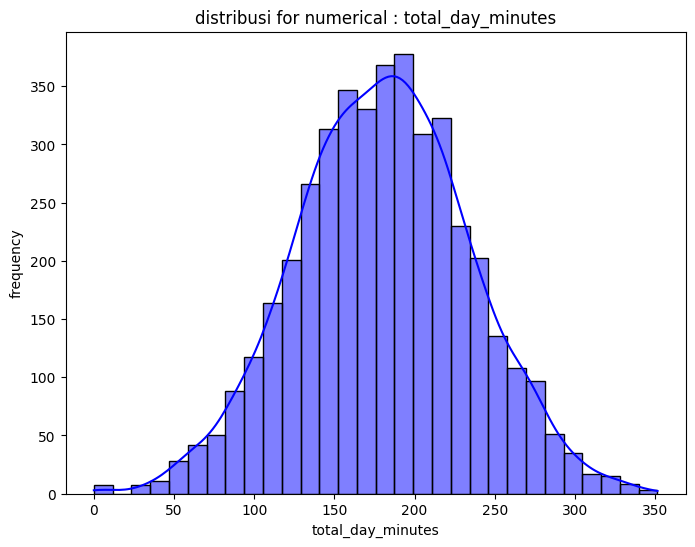

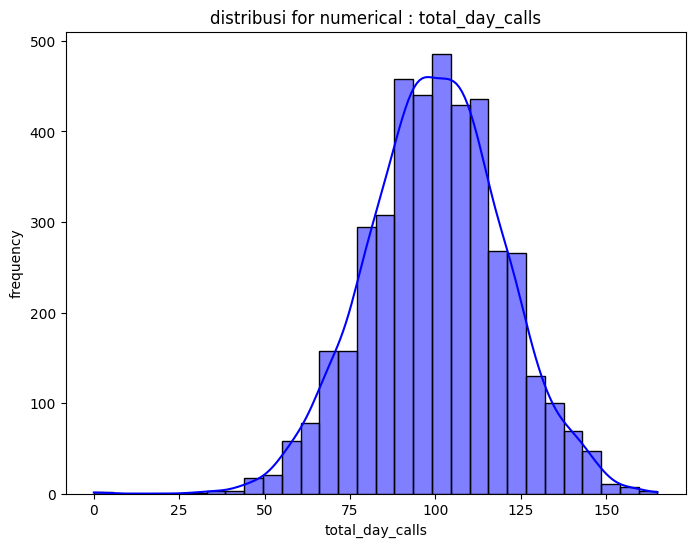

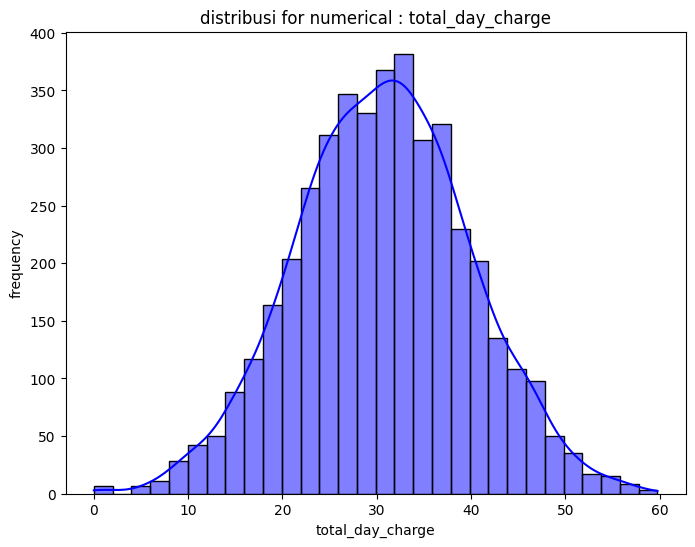

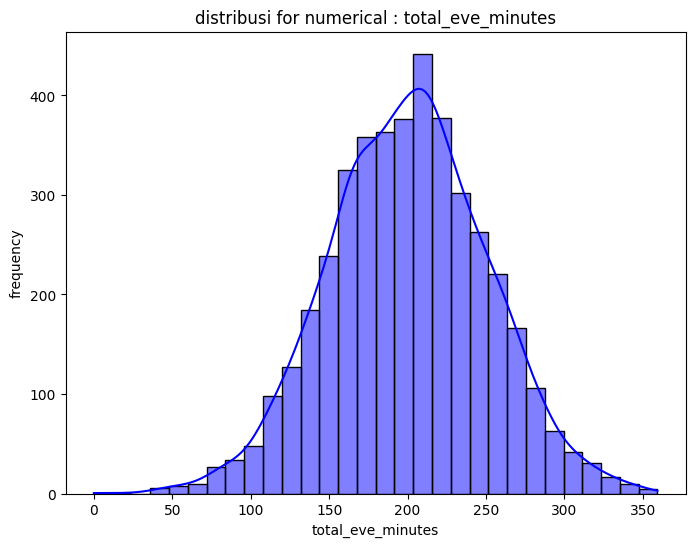

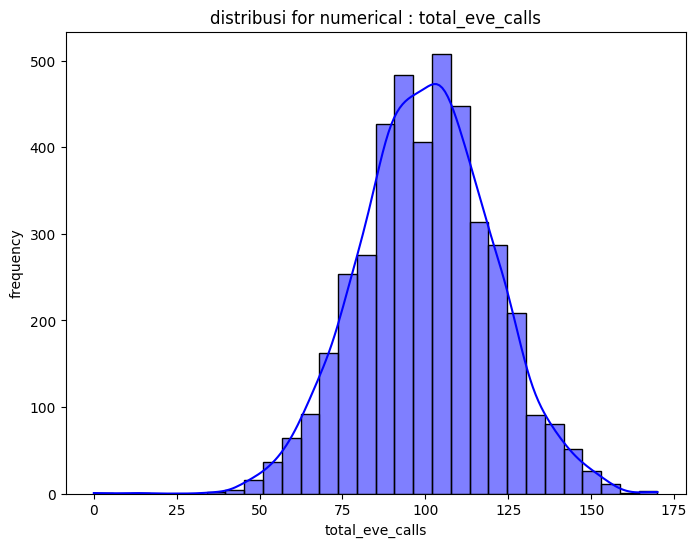

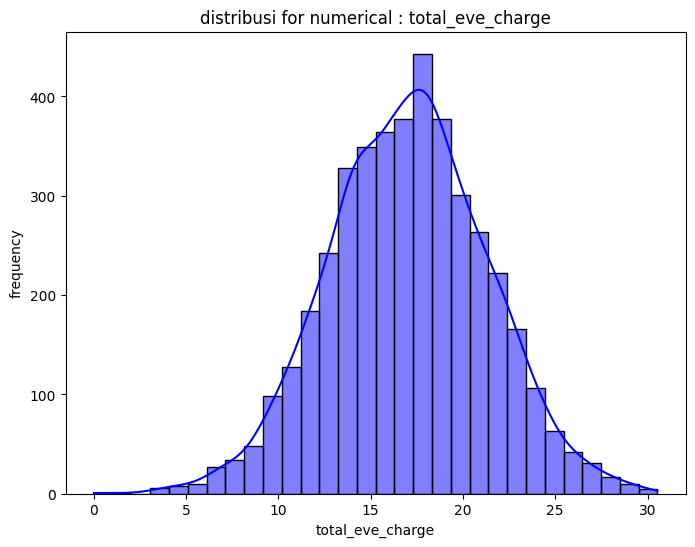

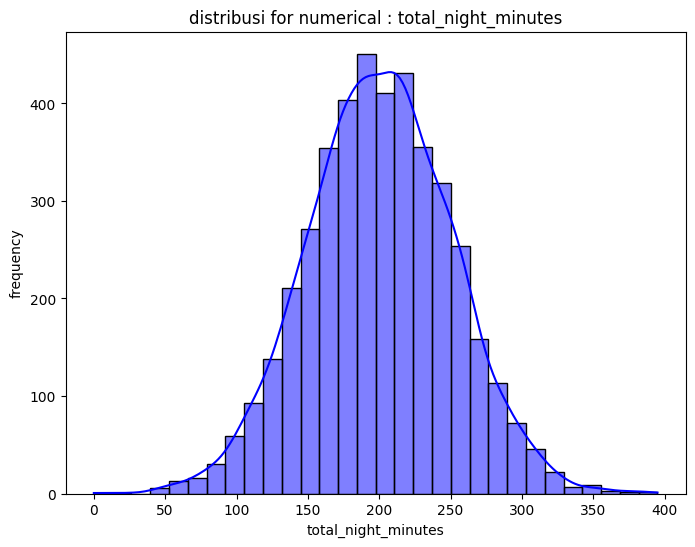

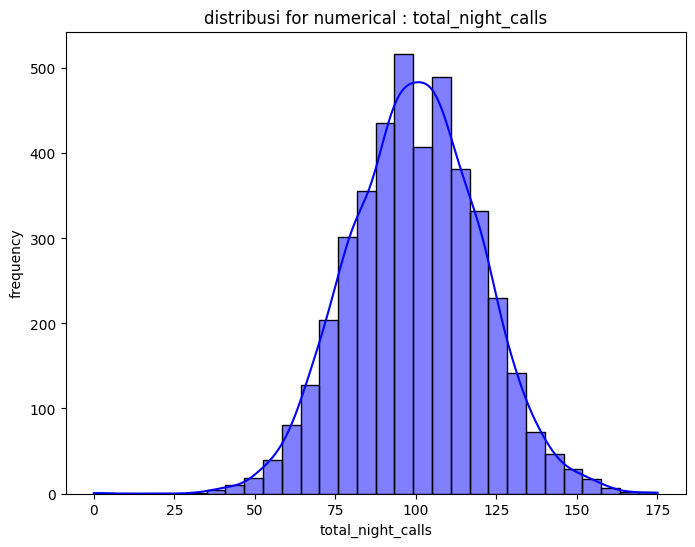

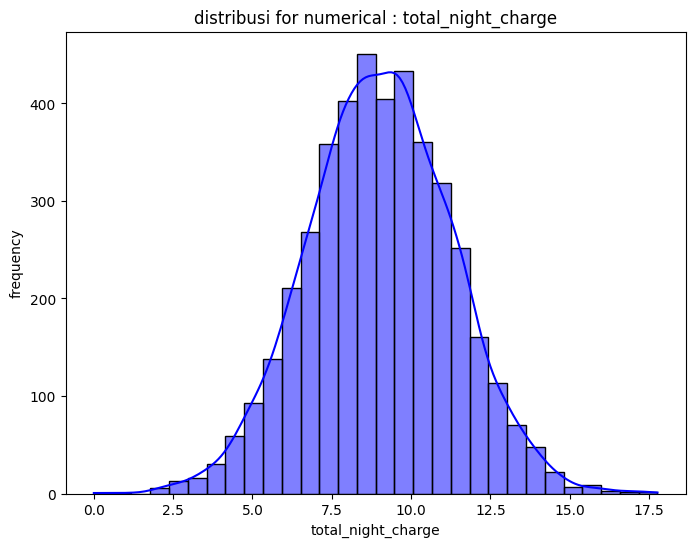

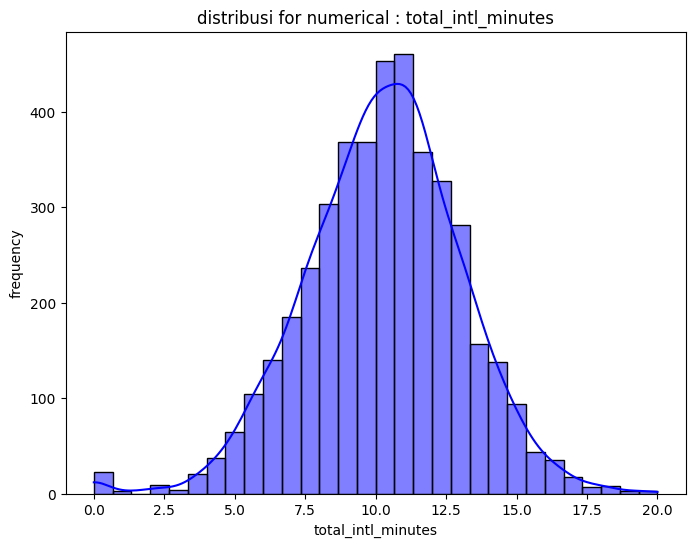

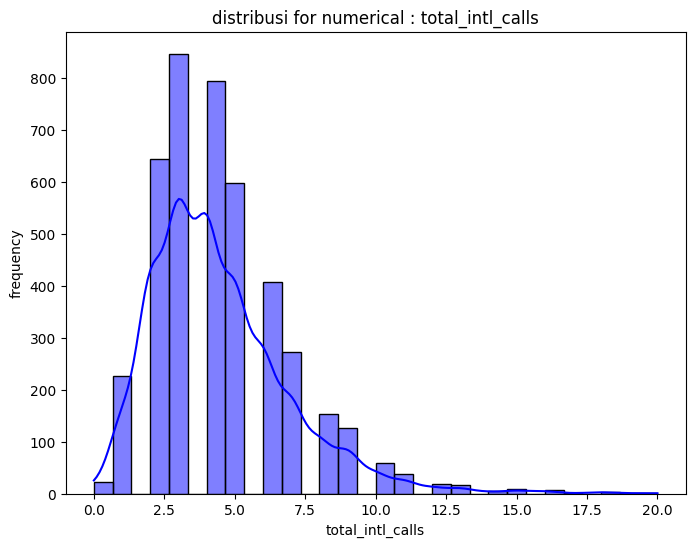

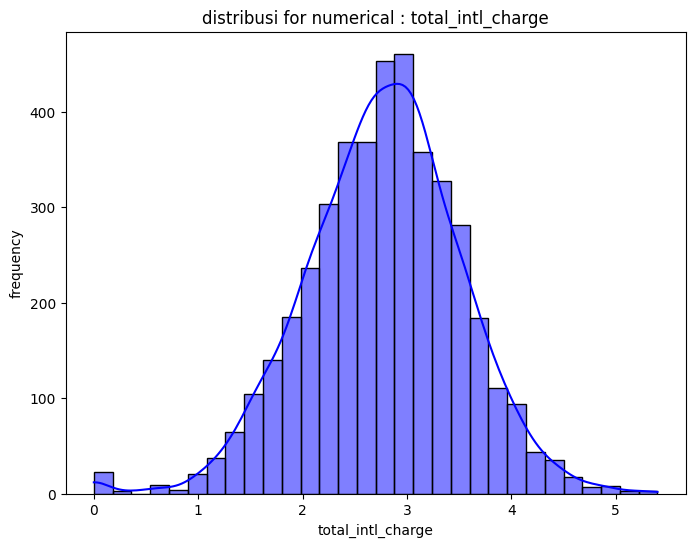

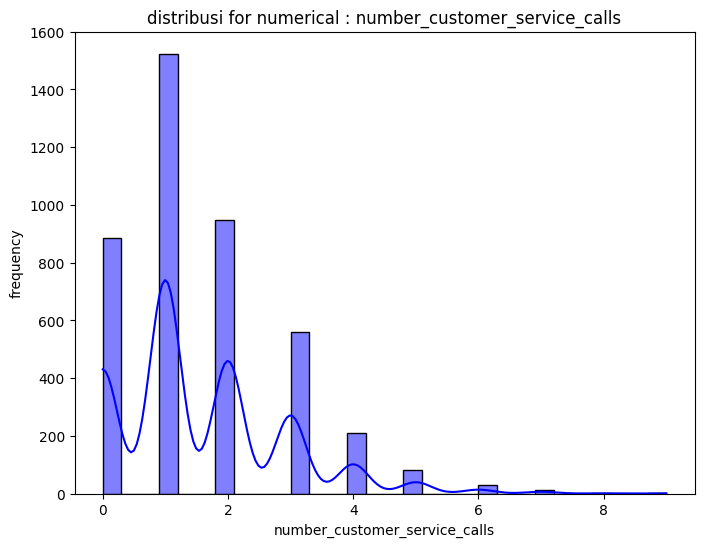

In [ ]:
import seaborn as sns

for feature in numerical:
  plt.figure(figsize= (8,6))
  sns.histplot(df[feature], kde=True, color='blue', bins=30)
  plt.title(f'distribusi for numerical : {feature}')
  plt.xlabel(feature)
  plt.ylabel('frequency')
  plt.show()

**hasil oberservasi** data numeric tinggi outlier

**insight**

1. grafik menunjukkan persebaran data positif
1. outlier paling tinggi yaitu custumer service calls





In [ ]:
# df.drop(
#     ['total_day_minutes', 'total_night_minutes', 'total_eve_minutes', 'total_intl_minutes', 'total_day_calls', 'total_night_calls', 'total_eve_calls'],
#     axis=1,
#     inplace=True
# )
# df.columns

## Univariate Analysis : categorical Features

In [ ]:
cats = df[['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']]

In [ ]:
df1 = df.copy()

### State

In [ ]:
state = df1.groupby('state').size().reset_index(name='total')
state['%'] = round(state['total'] * 100 / state['total'].sum(), 3)
state_sort = state.sort_values(by='total', ascending=False)
state_sort

,state,total,%
49,WV,139,3.271
23,MN,108,2.541
13,ID,106,2.494
1,AL,101,2.376
45,VA,100,2.353
37,OR,99,2.329
43,TX,98,2.306
44,UT,97,2.282
31,NJ,96,2.259
34,NY,96,2.259


<ipython-input-23-e3adf56d47c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_state.index, y=top_state.values, palette='viridis')


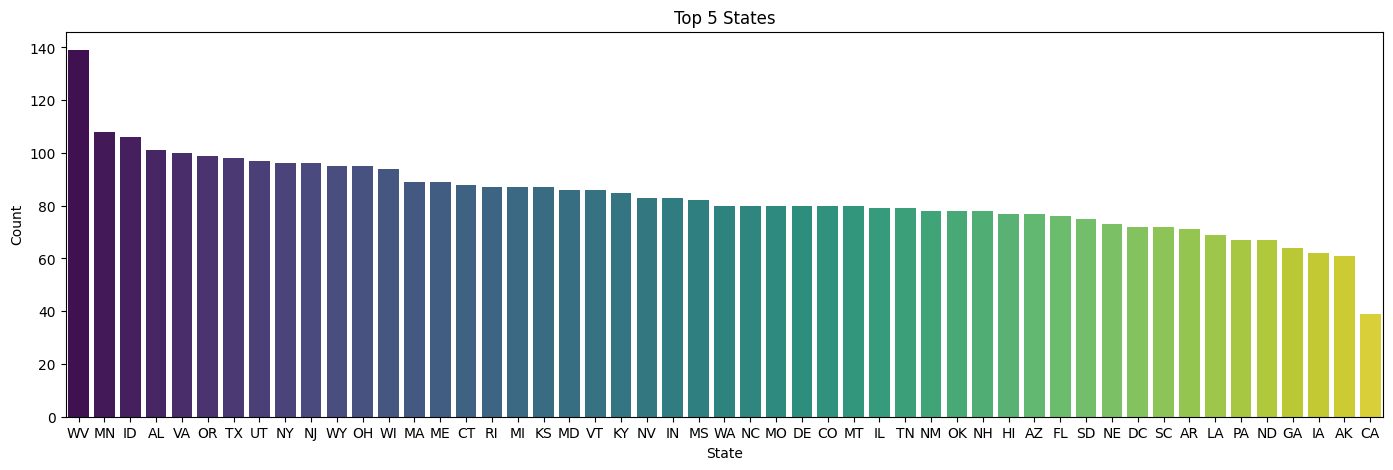

In [ ]:
state_counts = df1['state'].value_counts()
top_state = state_counts

plt.figure(figsize=(17,5))
sns.barplot(x=top_state.index, y=top_state.values, palette='viridis')

plt.title('Top 5 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

feature **state** didominasi oleh state 'wv'  degan persentase 3.271% dari populasi

### Area code

In [ ]:
area_code = df1.groupby('area_code').size().reset_index(name='total')
area_code['%'] = round(area_code['total'] * 100 / area_code['total'].sum(), 3)
area_code_sort = area_code.sort_values(by='total', ascending=False)
area_code_sort

,area_code,total,%
1,area_code_415,2108,49.600
0,area_code_408,1086,25.553
2,area_code_510,1056,24.847


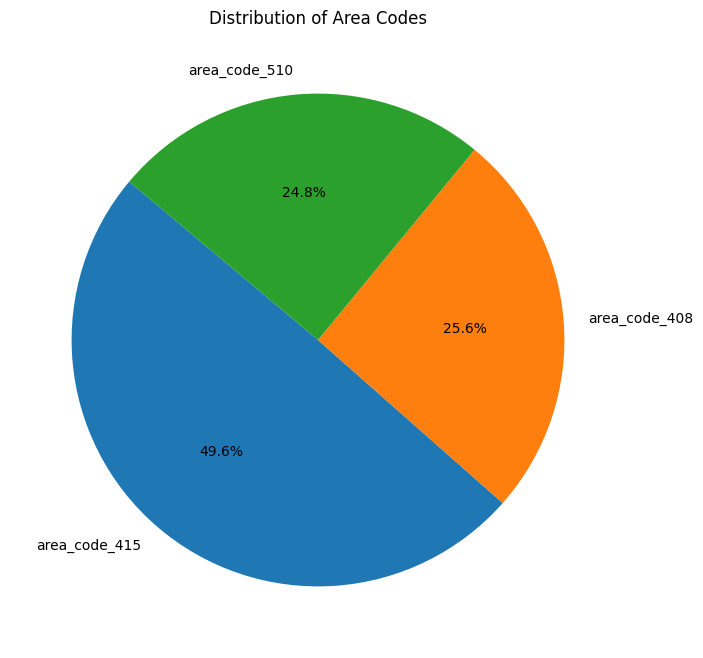

In [ ]:
plt.figure(figsize=(8, 8))
df1['area_code'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Area Codes')
plt.ylabel('')
plt.show()

area code 415 mendomanisasi populasi yaitu sebesar 49% dari populasi

### Voice Mail Plan

In [ ]:
voice_mail = df1.groupby('voice_mail_plan').size().reset_index(name='total')
voice_mail ['%'] = round(voice_mail['total'] * 100 / voice_mail['total'].sum(), 3)
voice_mail_sort = voice_mail.sort_values(by='total', ascending=False)
voice_mail_sort

,voice_mail_plan,total,%
0,no,3138,73.835
1,yes,1112,26.165


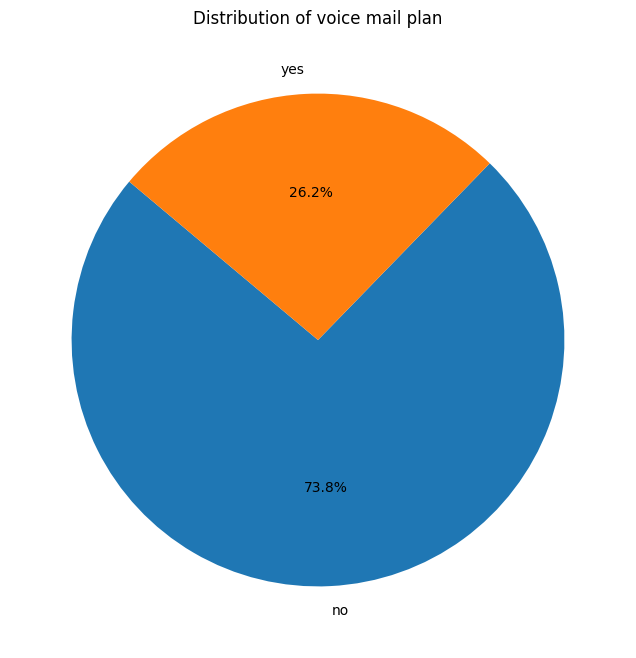

In [ ]:
plt.figure(figsize=(8, 8))
df1['voice_mail_plan'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of voice mail plan')
plt.ylabel('')
plt.show()

voice mail plan didomanisasi oleh no dengan persentase sebesar 73.8% dari populasi

### Churn

not_churned:  3652 , churned:  598


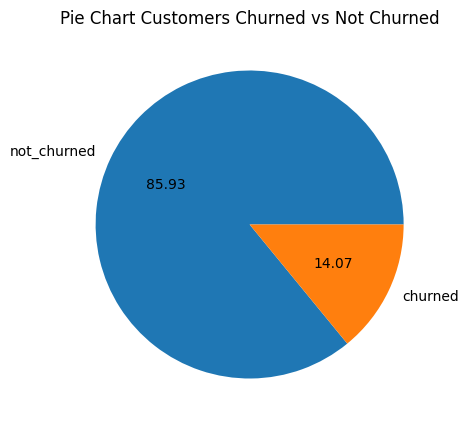

In [ ]:
not_churned = df[df['churn']=='no']['churn'].count()
churned = df[df['churn']=='yes']['churn'].count()
print('not_churned: ',not_churned,', churned: ',churned)

fig = plt.figure(figsize=(5,5))
plt.pie([not_churned,churned], labels=['not_churned','churned'],autopct='%.2f')
plt.title('Pie Chart Customers Churned vs Not Churned')
plt.show()


feature pada **Churn** didominasi oleh label no churn dengan presentase 85$ dari jumlah populasi. Imbalance data

## Bivariate Analysis: Categorical Features

menetapkan variabel target yaitu churn

In [ ]:
df1['target'] = np.where(df1['churn'] == 'yes', 1, 0)


In [ ]:
target = df1.groupby('churn').size().reset_index(name='total')
target ['%'] = round(target['total'] * 100 / target['total'].sum(), 3)
target_sort = target.sort_values(by='total', ascending=False)
target_sort

,churn,total,%
0,no,3652,85.929
1,yes,598,14.071


In [ ]:
df1

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,target
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,0
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,0
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,no,0
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,0
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,...,20.72,213.7,79,9.62,10.3,6,2.78,0,no,0
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,...,11.15,186.2,89,8.38,11.5,6,3.11,3,no,0
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,...,16.41,129.1,104,5.81,6.9,7,1.86,1,no,0
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,...,18.96,297.5,116,13.39,9.9,5,2.67,2,no,0


In [ ]:
cats = df1[['state', 'area_code', 'international_plan', 'voice_mail_plan']]

In [ ]:
print(cats)

     state      area_code international_plan voice_mail_plan
0       OH  area_code_415                 no             yes
1       NJ  area_code_415                 no              no
2       OH  area_code_408                yes              no
3       OK  area_code_415                yes              no
4       MA  area_code_510                 no             yes
...    ...            ...                ...             ...
4245    MT  area_code_415                 no              no
4246    WV  area_code_408                 no              no
4247    NC  area_code_408                 no              no
4248    HI  area_code_408                 no             yes
4249    VT  area_code_415                 no             yes

[4250 rows x 4 columns]


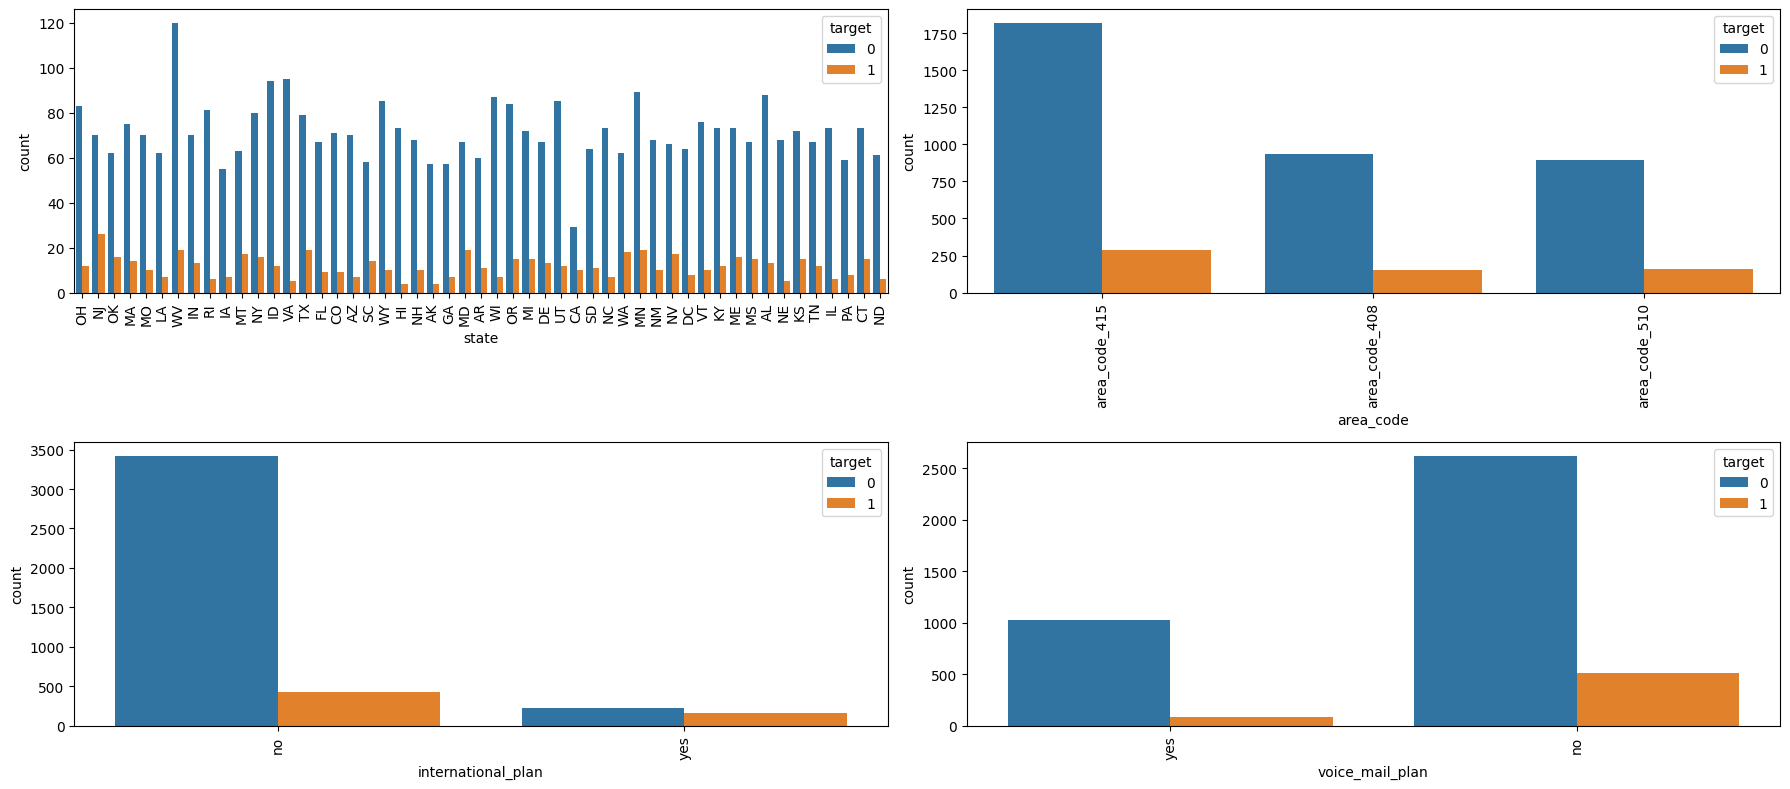

In [ ]:
plt.figure(figsize=(18, 8))

for i in range(len(cats.columns)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df1, x=cats.columns[i], hue='target')
    plt.xlabel(cats.columns[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

plt.show()


**insight**

1.   pada kolom **state**  yang paling banyak melakukan churn pada kode "NJ" sedangkan yang paling banyak tidak churn terlatak pada code "wv"
2.   pada kolom **Area Code** area code 415 yang tidak churn sebanyak 1750 pelanggan sedangkan yang churn sebanyak 250 pelanggan.

1.   yang tidak berlangganan **international plan** yang paling banyak churn sebanyak 500 sedangkan yang tidak churn sebanyak 3500
2.   pelanggan **voice mail plan** yang tidak berlangganan tidak churn sebanyak 2500 sedangkan yang churn sebanyak 700





## Bivariate Analysis : Numeric Features

In [ ]:
print(numerical)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [ ]:
nums = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']

In [ ]:
len(nums)

15

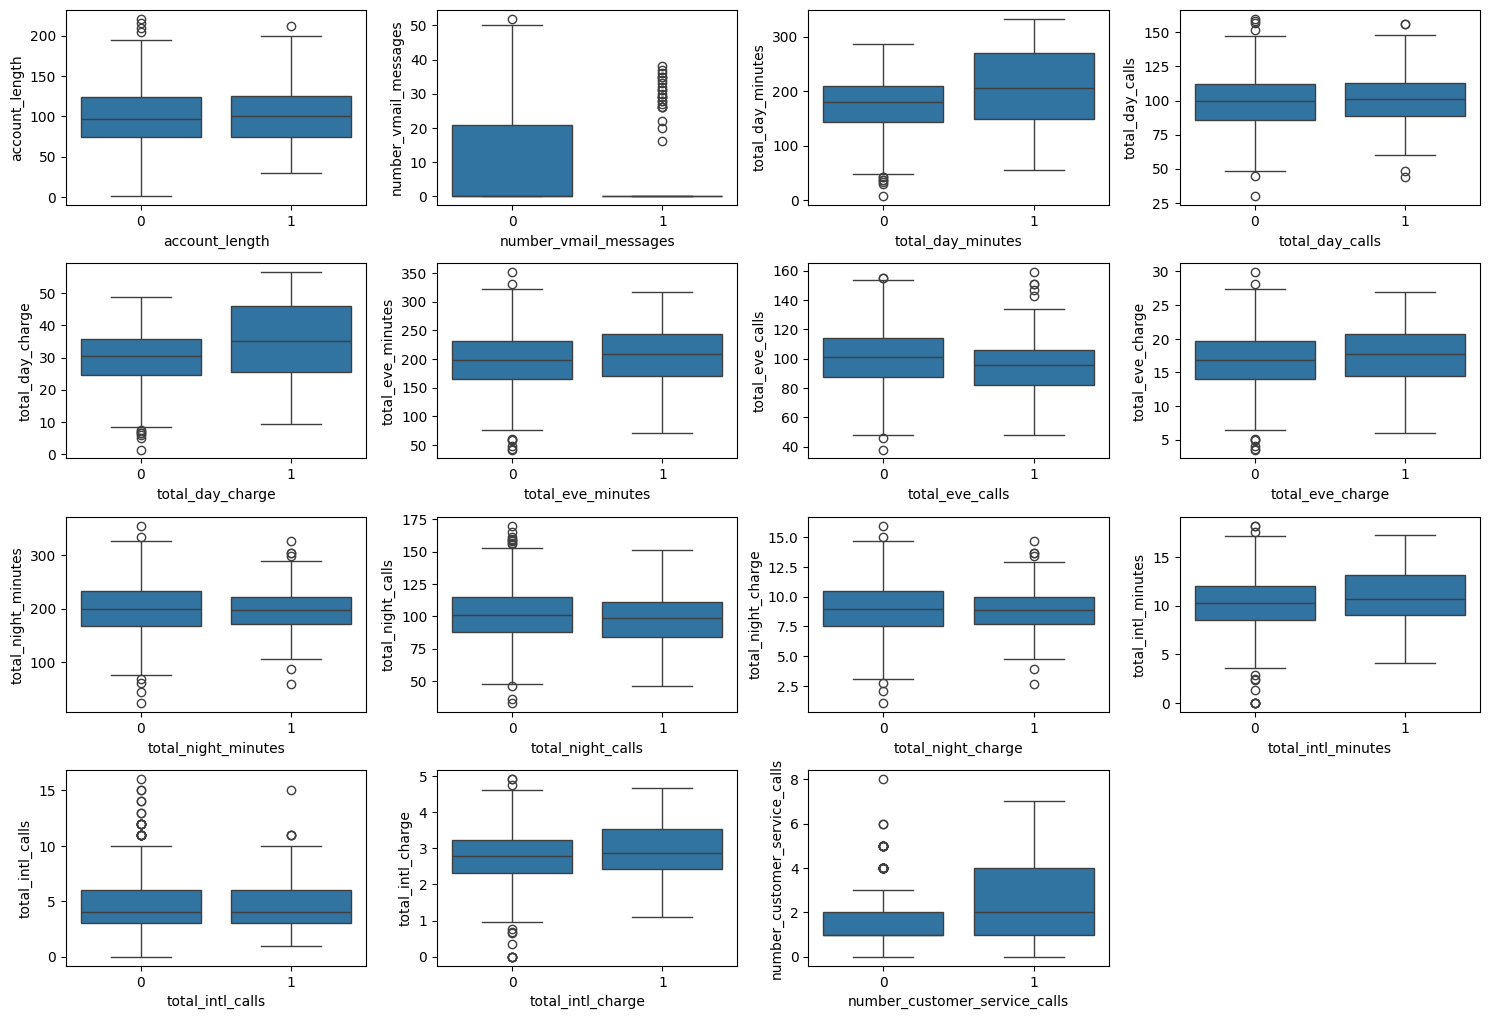

In [ ]:
df_sample = df1.sample(1000, random_state=1)

plt.figure(figsize=(15,20))
for i in range(0, len(nums)):
    plt.subplot(8, 4, i+1)
    sns.boxplot(y=df_sample[nums[i]], x=df1['target'])
    plt.xlabel(nums[i])
    plt.tight_layout()

plt.show()


`obeservasi`

*   **account length** menunjukkan lama durasi pelanggan dengan chrun dan tidak churn seimbang
*   column **number vmail massage** pelanggan yang churn 0
* **total day minutes**  total menit panggilan siang hari 150-200 tidak melakukan churn dan pelanggalan dengan total lebih 150 adalah melakukan churn





## Multivariate Analysis

<ipython-input-39-da09868d08b5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


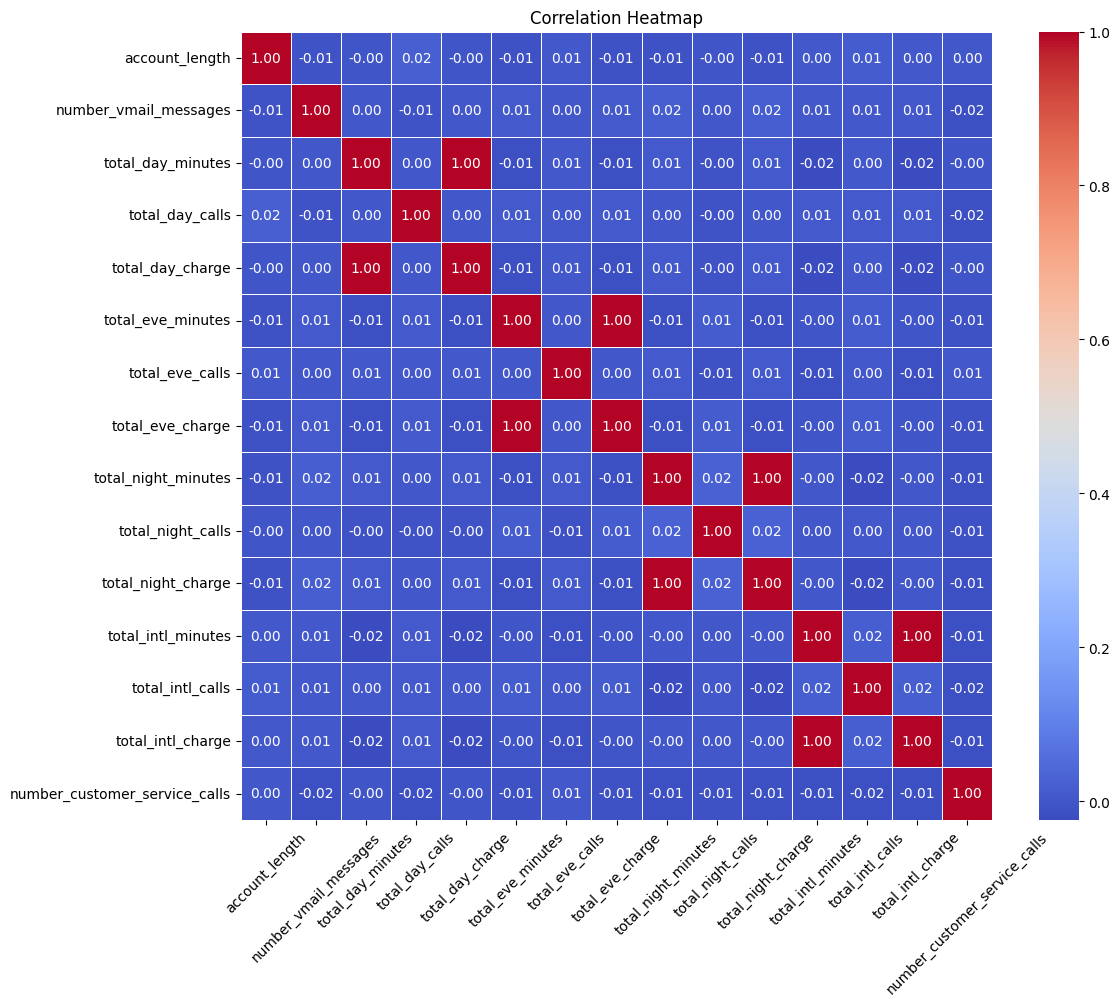

In [ ]:
# correlation
correlation = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.xticks(rotation=45)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.title('Correlation Heatmap')
plt.show()

## Label Data Encoder

In [ ]:
print(df['churn'].unique())


['no' 'yes']


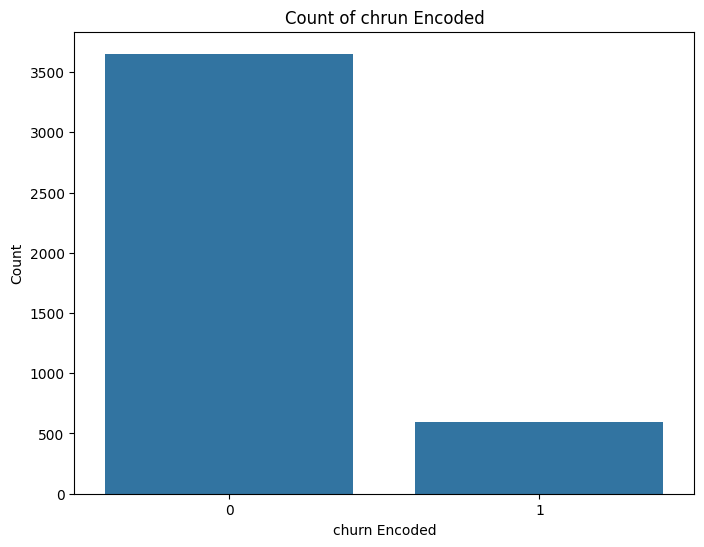

In [ ]:
#churn
df['churn'] = df['churn'].map({'no': 0, 'yes': 1})

plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df)
plt.title('Count of chrun Encoded')
plt.xlabel('churn Encoded')
plt.ylabel('Count')
plt.show()

In [ ]:
df.drop(columns='state', inplace=True)

In [ ]:
df

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


# Data Preprocessing

## Data Splitting

proporsi pembagian data pada proses ini yaitu 80:10:10

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)
X_dev, X_test, y_dev, y_test = train_test_split(X_rest, y_rest, test_size=0.5, stratify=y_rest, random_state=2)


print("Ukuran data training:", X_train.shape)
print("Ukuran data development:", X_dev.shape)
print("Ukuran data test:", X_test.shape)



Ukuran data training: (3400, 18)
Ukuran data development: (425, 18)
Ukuran data test: (425, 18)


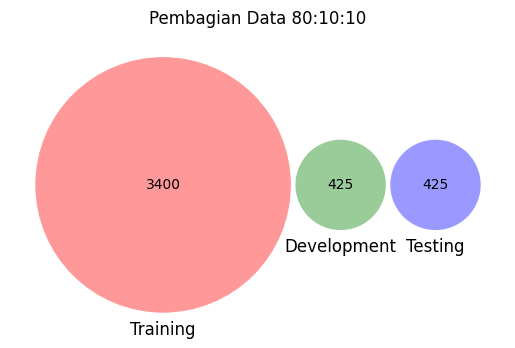

In [ ]:
from matplotlib_venn import venn3

train_samples = set(X_train.index)
dev_samples = set(X_dev.index)
test_samples = set(X_test.index)

venn = venn3([train_samples, dev_samples, test_samples], ('Training', 'Development', 'Testing'))


plt.title("Pembagian Data 80:10:10")
plt.show()

In [ ]:
df.isnull().sum()

account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

## Feature Encoding

In [ ]:
df.dtypes

account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [ ]:
# df['state'].unique()

In [ ]:
X_train

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
3037,69,area_code_408,no,yes,38,272.9,122,46.39,188.4,97,16.01,132.4,87,5.96,10.5,3,2.84,2
353,163,area_code_415,no,no,0,122.4,129,20.81,113.4,108,9.64,180.2,97,8.11,12.5,7,3.38,1
3770,88,area_code_415,no,yes,37,181.7,88,30.89,237.4,106,20.18,209.1,111,9.41,9.5,5,2.57,2
921,116,area_code_415,no,yes,35,200.4,104,34.07,272.8,89,23.19,214.5,100,9.65,8.3,4,2.24,1
4056,62,area_code_408,no,no,0,119.3,94,20.28,224.0,81,19.04,156.7,78,7.05,12.1,6,3.27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,39,area_code_510,no,no,0,185.0,113,31.45,106.5,125,9.05,167.3,78,7.53,12.0,2,3.24,0
2505,125,area_code_415,no,no,0,233.3,65,39.66,209.8,93,17.83,210.6,109,9.48,9.1,4,2.46,1
2101,48,area_code_510,no,no,0,149.2,146,25.36,161.9,109,13.76,197.9,109,8.91,8.3,2,2.24,3
3771,169,area_code_408,no,no,0,240.7,119,40.92,141.1,102,11.99,120.6,56,5.43,7.7,2,2.08,2


In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

# state_encoder = OneHotEncoder().fit(X_train[['state']])
area_code_encoder = OneHotEncoder(sparse=False).fit(X_train[['area_code']])
international_plan_encoder = OrdinalEncoder().fit(X_train[['international_plan']])
voice_mail_plan_encoder = OrdinalEncoder().fit(X_train[['voice_mail_plan']])

# Transformasi pada data pelatihan
train_encoded = X_train.assign(
    # state = state_encoder.transform(X_train[['state']]).toarray(),
    area_code = area_code_encoder.transform(X_train[['area_code']]),
    international_plan = international_plan_encoder.transform(X_train[['international_plan']]),
    voice_mail_plan = voice_mail_plan_encoder.transform(X_train[['voice_mail_plan']])
)
# Transformasi pada data pengujian
test_encoded = X_test.assign(
    # state = state_encoder.transform(X_test[['state']]).toarray(),
    area_code = area_code_encoder.transform(X_test[['area_code']]),
    international_plan = international_plan_encoder.transform(X_test[['international_plan']]),
    voice_mail_plan = voice_mail_plan_encoder.transform(X_test[['voice_mail_plan']])
)
dev_encoded = X_dev.assign(
    # state = state_encoder.transform(X_dev[['state']]).toarray(),
    area_code = area_code_encoder.transform(X_dev[['area_code']]),
    international_plan = international_plan_encoder.transform(X_dev[['international_plan']]),
    voice_mail_plan = voice_mail_plan_encoder.transform(X_dev[['voice_mail_plan']])
)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
train_encoded[['area_code', 'international_plan', 'voice_mail_plan']]


,area_code,international_plan,voice_mail_plan
3037,1.0,0.0,1.0
353,0.0,0.0,0.0
3770,0.0,0.0,1.0
921,0.0,0.0,1.0
4056,1.0,0.0,0.0
...,...,...,...
3514,0.0,0.0,0.0
2505,0.0,0.0,0.0
2101,0.0,0.0,0.0
3771,1.0,0.0,0.0


In [ ]:
train_encoded.isnull().sum()

account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [ ]:
train_encoded.isnull().sum()

account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

## Handling Imbalance Data

karena tingkat imbalance data tinggi, maka dilakukan teknik imbalance sampling menggunakan 3 percobaan yaitu over sampling dengan menggunakan SMOTE, random under sampler, dan random over sampler.

In [ ]:
a = pd.Series(y_train).value_counts().reset_index()
a.columns=['churn','total']
a['%'] = round(a['total']*100/sum(a['total']),3)
a

,churn,total,%
0,0,2922,85.941
1,1,478,14.059


In [ ]:
b = train_encoded['voice_mail_plan'].value_counts().reset_index()
b.columns = ['voice_mail_plan', 'total']
b['%'] = round(b['total'] * 100 / b['total'].sum(), 3)
b

,voice_mail_plan,total,%
0,0.0,2527,74.324
1,1.0,873,25.676


In [ ]:
c = train_encoded['international_plan'].value_counts().reset_index()
c.columns = ['international_plan', 'total']
c['%'] = round(b['total'] * 100 / c['total'].sum(), 3)
c

,international_plan,total,%
0,0.0,3077,74.324
1,1.0,323,25.676


In [ ]:
from imblearn import under_sampling, over_sampling
X_train_under1, y_train_under1= under_sampling.RandomUnderSampler(sampling_strategy='auto').fit_resample(train_encoded, y_train)
X_train_over1, y_train_over1= over_sampling.RandomOverSampler(sampling_strategy='auto').fit_resample(train_encoded, y_train)
X_train_smote, y_train_smote= over_sampling.SMOTE(sampling_strategy='auto').fit_resample(train_encoded, y_train)

In [ ]:
# before vs after imbance sampling
print("before :",train_encoded.shape)
print("after SMOTE:", X_train_smote.shape)
print("after under sampling:", X_train_under1.shape)
print("after over sampling:", X_train_over1.shape)

before : (3400, 18)
after SMOTE: (5844, 18)
after under sampling: (956, 18)
after over sampling: (5844, 18)


***untuk mengurangi overfitting pada maka digunanakna teknik SMOTE karena dinilai lebih baik dalam menangani overfitting dibandingkan dengan teknik lain***

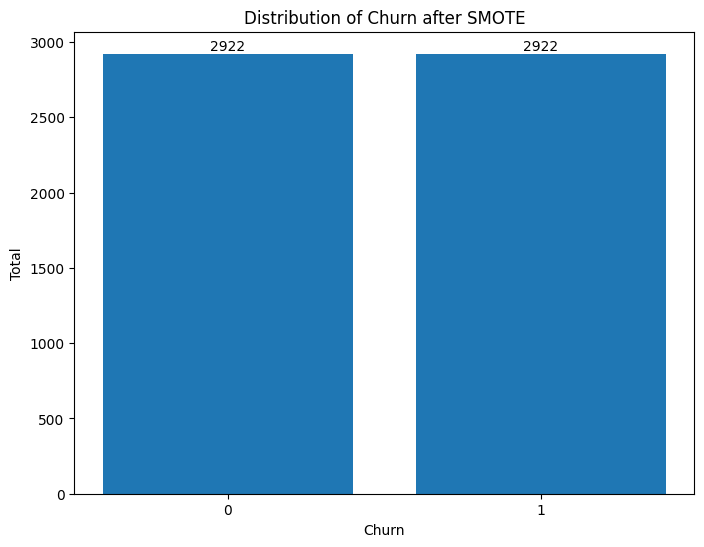

In [ ]:
a = pd.Series(y_train_smote).value_counts().reset_index()
a.columns=['churn after smote','total']
a['%'] = round(a['total']*100/sum(a['total']),3)
a

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(a['churn after smote'], a['total'])
plt.title('Distribution of Churn after SMOTE')
plt.xlabel('Churn')
plt.ylabel('Total')
plt.xticks(a['churn after smote'])
for i, value in enumerate(a['total']):
    plt.text(i, value + 20, str(value), ha='center')
plt.show()

In [ ]:
# scaler = StandardScaler()
# scaler.fit(X_train_smote)

# X_train_scaled = pd.DataFrame(
#     scaler.transform(X_train_smote)
#     columns = X_train_smote.columns
# )
# X_dev_scaled = pd.DataFrame(
#     scaler.transform(X_dev_encoded)
#     columns = X_dev_encoded.columns
# )
# X_test_scaled = pd.DataFrame(
#     scaled.transform(X_test_encoded)
#     columns = X_test_encoded.columns
# )

# Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE


onehot_pipeline = Pipeline([
    ('onehot', OneHotEncoder(sparse=False))
])

label_encoder_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])


preprocessor_pipeline = ColumnTransformer([
    ('onehot', onehot_pipeline, ['area_code']),
    ('label_encoder', label_encoder_pipeline, ['voice_mail_plan', 'international_plan'])
])

# Define SMOTE pipeline
smote_pipeline = ImbPipeline([
    ('smote', SMOTE(sampling_strategy='auto'))
])

pipeline = Pipeline([
    ('preprocessor', preprocessor_pipeline),
    ('smote', smote_pipeline)
])

# Fit the pipeline to X_train
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['area_code']),
                                                 ('label_encoder',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder())]),
                                                  ['voice_mail_plan',
                                                   'international_plan'])])),
                ('smote', Pipeline(steps=[('smote', SMOTE())]))])

In [ ]:
preprocessor_pipeline

ColumnTransformer(transformers=[('onehot',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(sparse=False))]),
                                 ['area_code']),
                                ('label_encoder',
                                 Pipeline(steps=[('encoder',
                                                  OrdinalEncoder())]),
                                 ['voice_mail_plan', 'international_plan'])])

In [ ]:
preprocessor_pipeline.fit(X_train)

X_train_preprocessed = preprocessor_pipeline.transform(X_train)
X_test_preprocessed = preprocessor_pipeline.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Save the pipeline
import pickle
with open('preprocessor_pipeline.pkl', 'wb') as file:
    pickle.dump(preprocessor_pipeline, file)

In [ ]:
with open ('preprocessor_pipeline.pkl', 'rb') as file:
  preprocessor_pipeline = pickle.load(file)

# Modelling

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def eval_model(model, X_train_smote, y_train_smote, X_test, y_test, X_dev, y_dev_pred):

  print("Evaluasi Model dengan  (X_dev):")
  print("Accuracy:", accuracy_score(y_dev, y_dev_pred))
  print("Precision:", precision_score(y_dev, y_dev_pred))
  print("Recall:", recall_score(y_dev, y_dev_pred))
  print("F1-Score:", f1_score(y_dev, y_dev_pred))

  print("\nClassification Report:")
  print(classification_report(y_dev, y_dev_pred))

## Random Forest

Evaluasi Model dengan  (X_dev):
Accuracy: 0.9552941176470588
Precision: 0.9019607843137255
Recall: 0.7666666666666667
F1-Score: 0.8288288288288289

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       365
           1       0.90      0.77      0.83        60

    accuracy                           0.96       425
   macro avg       0.93      0.88      0.90       425
weighted avg       0.95      0.96      0.95       425



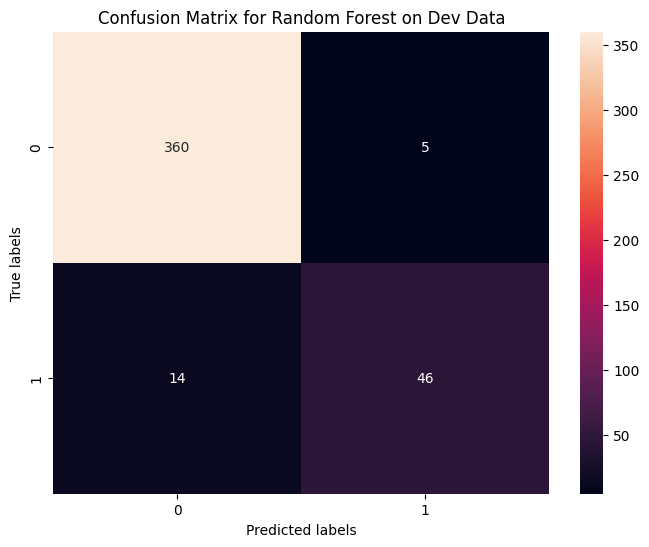

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)

y_test_pred = rf.predict(test_encoded)
y_dev_pred = rf.predict(dev_encoded)

eval_model(rf, X_train_smote, y_train_smote, test_encoded, test_encoded, dev_encoded, y_dev_pred)



cm_rf = confusion_matrix(y_dev, y_dev_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d")
plt.title("Confusion Matrix for Random Forest on Dev Data")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

## Decision Tree

Evaluasi Model dengan  (X_dev):
Accuracy: 0.8776470588235294
Precision: 0.5487804878048781
Recall: 0.75
F1-Score: 0.6338028169014085

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       365
           1       0.55      0.75      0.63        60

    accuracy                           0.88       425
   macro avg       0.75      0.82      0.78       425
weighted avg       0.90      0.88      0.89       425



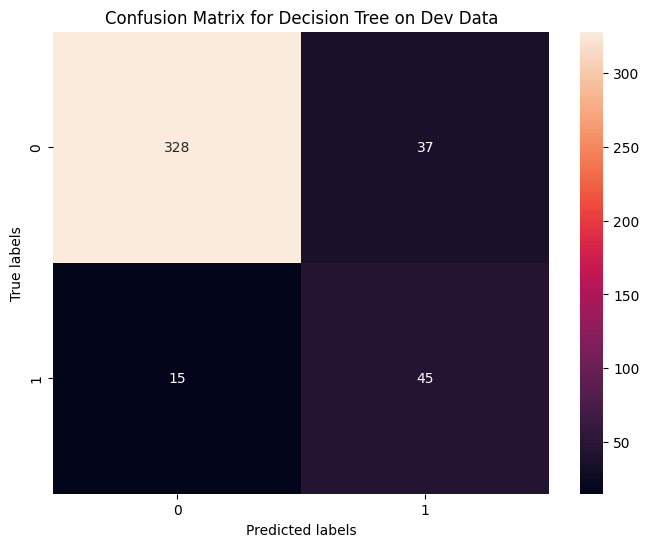

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train_smote, y_train_smote)

y_test_pred = dt.predict(test_encoded)
y_dev_pred = dt.predict(dev_encoded)

eval_model(rf, X_train_smote, y_train_smote,test_encoded, y_test, dev_encoded, y_dev_pred)


cm_dt = confusion_matrix(y_dev, y_dev_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d")
plt.title("Confusion Matrix for Decision Tree on Dev Data")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()


## SVM

Evaluasi Model dengan  (X_dev):
Accuracy: 0.8847058823529412
Precision: 0.5964912280701754
Recall: 0.5666666666666667
F1-Score: 0.5811965811965812

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       365
           1       0.60      0.57      0.58        60

    accuracy                           0.88       425
   macro avg       0.76      0.75      0.76       425
weighted avg       0.88      0.88      0.88       425



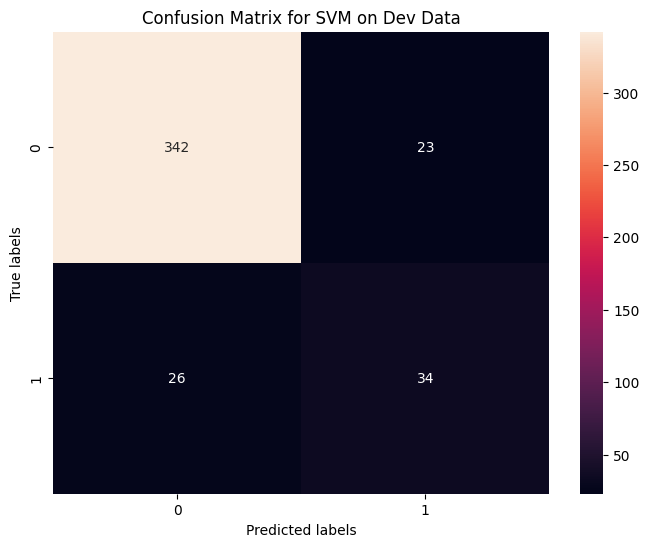

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)

y_test_pred = svm_model.predict(test_encoded)
y_dev_pred = svm_model.predict(dev_encoded)

eval_model(svm_model, X_train_smote, y_train_smote, test_encoded, y_test, dev_encoded, y_dev_pred)

cm_svm = confusion_matrix(y_dev, y_dev_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d")
plt.title("Confusion Matrix for SVM on Dev Data")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Hyperparameter Tunning

In [ ]:
# Random Forest

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
rf = RandomForestClassifier(random_state=1)

hyperparameters = {
    'max_depth': [5, 10, 25, 50],
    'min_samples_split': [5, 10, 25, 50, 100],
    'min_samples_leaf': [25, 50, 100, 125],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inisialisasi GridSearchCV dengan model dan grid hyperparameter
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, scoring='accuracy')
rf_tuned.fit(X_train_smote, y_train_smote)

y_dev_pred = rf_tuned.predict(dev_encoded)
y_test_pred = rf_tuned.predict(test_encoded)
eval_model(rf_tuned, X_train_smote, y_train_smote, test_encoded, y_test, dev_encoded, y_dev_pred)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Evaluasi Model dengan  (X_dev):
Accuracy: 0.9435294117647058
Precision: 0.8214285714285714
Recall: 0.7666666666666667
F1-Score: 0.793103448275862

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       365
           1       0.82      0.77      0.79        60

    accuracy                           0.94       425
   macro avg       0.89      0.87      0.88       425
weighted avg       0.94      0.94      0.94       425



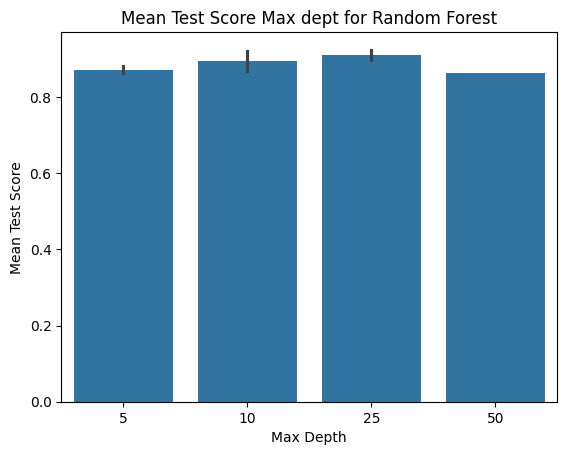

In [ ]:
results = rf_tuned.cv_results_
hyperparameters = results['params']
scores = results['mean_test_score']
results_df = pd.DataFrame(hyperparameters)
results_df['mean_test_score'] = scores

sns.barplot(x='max_depth', y='mean_test_score', data=results_df)
plt.title('Mean Test Score Max dept for Random Forest')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.show()

In [ ]:
# Decision Tree

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

hyperparameters = {
    'max_depth': [5, 10, 25, 50],
    'min_samples_split': [5, 10, 25, 50, 100],
    'min_samples_leaf': [25, 50, 100, 125],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=1)
dt_tuned = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=1, scoring='accuracy')
dt_tuned.fit(X_train_smote, y_train_smote)

y_dev_pred = dt_tuned.predict(dev_encoded)
y_test_pred = dt_tuned.predict(test_encoded)
eval_model(dt_tuned, X_train_smote, y_train_smote, test_encoded, y_test, dev_encoded, y_dev_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Evaluasi Model dengan  (X_dev):
Accuracy: 0.9058823529411765
Precision: 0.6612903225806451
Recall: 0.6833333333333333
F1-Score: 0.6721311475409835

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       365
           1       0.66      0.68      0.67        60

    accuracy                           0.91       425
   macro avg       0.80      0.81      0.81       425
weighted avg       0.91      0.91      0.91       425



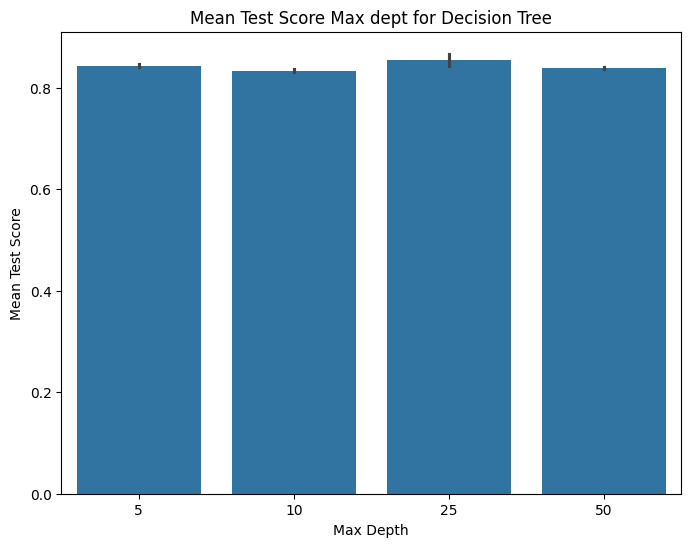

In [ ]:
results = dt_tuned.cv_results_
hyperparameters = results['params']
scores = results['mean_test_score']
result_df = pd.DataFrame(hyperparameters)
results_df['mean_test_score'] = scores

plt.figure(figsize=(8, 6))
sns.barplot(x='max_depth', y='mean_test_score', data=results_df)
plt.title('Mean Test Score Max dept for Decision Tree')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.show()

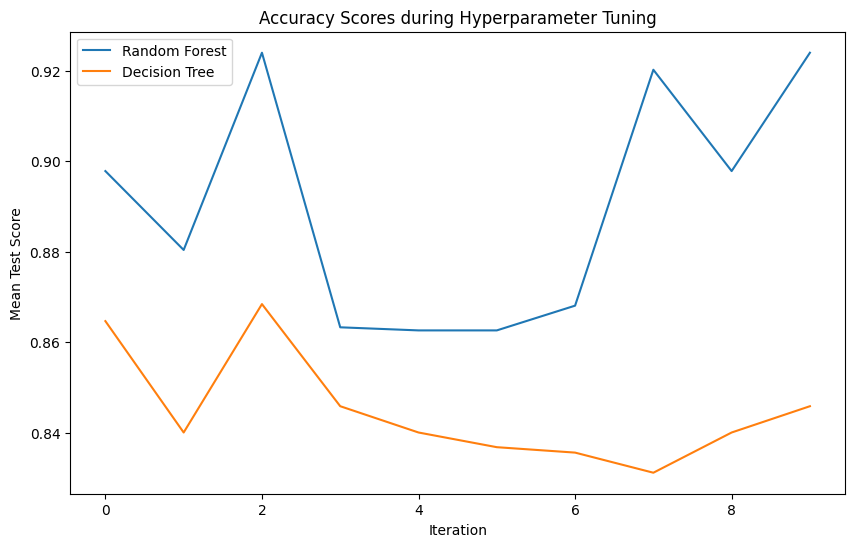

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


scores_rf = rf_tuned.cv_results_['mean_test_score']
scores_dt = dt_tuned.cv_results_['mean_test_score']

# Membuat array yang berisi nomor iterasi tuning untuk sumbu x
n_iter_rf = list(range(len(scores_rf)))
n_iter_dt = list(range(len(scores_dt)))

# Plotting skor akurasi untuk kedua model
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_iter_rf, y=scores_rf, label='Random Forest')
sns.lineplot(x=n_iter_dt, y=scores_dt, label='Decision Tree')
plt.title('Accuracy Scores during Hyperparameter Tuning')
plt.xlabel('Iteration')
plt.ylabel('Mean Test Score')
plt.legend()
plt.show()


hasil perbandingan dari hyperparameter tunning menunjukkan bahwa akurasi menggunakakn random forest lebih tinggi dibandingkan Decision Tree dan SVM, oleh karana itu untuk data testing digunakan model Random Forest

# Load Data Testing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_test = pd.read_csv('/content/drive/MyDrive/challange2/Data Test.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_test.dtypes

id                                 int64
state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [ ]:
data_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [ ]:
data_test.isnull().sum()

id                               0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
dtype: int64

In [ ]:
# # Load the pipeline
# with open('preprocessor_pipeline.pkl', 'rb') as file:
#     preprocessor_pipeline= pickle.load(file)

In [ ]:
# preprocess_test = preprocessor_pipeline.transform(data_test)
# preprocess_test.shape

In [ ]:
#label encoder manual data testing

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Fitur Encoding One-Hot pada Data Uji
area_code_encoder = OneHotEncoder(sparse=False).fit(data_test[['area_code']])

# Transformasi Data Uji
data_test_encoded = data_test.copy()
data_test_encoded['area_code'] = area_code_encoder.transform(data_test[['area_code']])

# Encoding Fitur Internasional Plan
data_test_encoded['international_plan'] = international_plan_encoder.transform(data_test[['international_plan']])

# Encoding Fitur Voice Mail Plan
data_test_encoded['voice_mail_plan'] = voice_mail_plan_encoder.transform(data_test[['voice_mail_plan']])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
data_test_encoded.drop(columns='state', inplace=True)

In [ ]:
data_test_encoded.dtypes

account_length                     int64
area_code                        float64
international_plan               float64
voice_mail_plan                  float64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
dtype: object

In [ ]:
data_test_encoded.drop(columns='id', axis=1, inplace=True)

In [ ]:
predict_test = rf_tuned.predict(data_test_encoded)
predict_test

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Save to PDF result prediction using Random Forest Classifier

In [ ]:
result = pd.DataFrame({'Prediction' : predict_test})

In [ ]:
result.to_csv('predicted_results.csv', index=False)

In [ ]:
from google.colab import files

files.download('predicted_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>